<a href="https://colab.research.google.com/github/ces0157/AI_class_project/blob/Sarah/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [235]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [236]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [237]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [238]:
#all nesseccary import statements
from datasets import load_dataset
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bingh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Dataset

In [239]:
#load the dataset and split into testing and training
dataset = load_dataset("yelp_review_full")
dp_train = dataset['train'].to_pandas()
dp_test = dataset['test'].to_pandas()

In [240]:
dp_train

,label,text
0,4,dr. goldberg offers everything i look for in a...
1,1,"Unfortunately, the frustration of being Dr. Go..."
2,3,Been going to Dr. Goldberg for over 10 years. ...
3,3,Got a letter in the mail last week that said D...
4,0,I don't know what Dr. Goldberg was like before...
...,...,...
649995,4,I had a sprinkler that was gushing... pipe bro...
649996,0,Phone calls always go to voicemail and message...
649997,0,Looks like all of the good reviews have gone t...
649998,4,I was able to once again rely on Yelp to provi...


# Functions

In [241]:
def custom_preprocessor(document):
    return re.sub(r'[^A-Za-z0-9\s]+', '', document)

In [242]:
def custom_tokenizer(text):
    wnl = WordNetLemmatizer()
    stemmer = SnowballStemmer('english', ignore_stopwords=True)
    
    text = ' '.join([word for word in text.split() if word not in (stop_words)])
    
    text = text.lower()
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    tokens = text.split()
    
    tokens = [wnl.lemmatize(token) for token in tokens]
    # tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [243]:
# Creates a count vectorizer with vocab from training data
def create_vectorizer(train_df, column_text, stop_words):
    sentences = train_df[column_text].values
    # vectorizer = CountVectorizer()  # add stop words here instead?
    vectorizer = TfidfVectorizer(min_df=3, ngram_range=(1, 2),
                preprocessor=None, tokenizer=custom_tokenizer) 
    #TODO: remove punctuation before creating vocab
    #TODO: use stemming to reduce words to their root form
    
    df = train_df.drop(columns=[column_text])

    # fit the vocabulary to the text data
    vectorizer.fit(sentences)
    print(f'Vocab length: {len(vectorizer.vocabulary_.keys())}')

    return vectorizer

In [244]:
# Passes in dataframe column, converts it a numpy array
# and performs the bag of word algorithm on it using vocab from training data
# Returns a sparse matrix
def create_bag_words(df, vectorizer, column_text):
    sentences = df[column_text].values
    df = df.drop(columns=[column_text])

    # create the bag-of-words model using previously-created vectorizer
    X = vectorizer.transform(sentences)

    return X

# Train Data

In [245]:
y_train = dp_train["label"].values

In [246]:
stop_words = list(set(stopwords.words('english')))
stop_words = [re.sub(r'[^A-Za-z0-9\s]+', '', word).lower() for word in stop_words]  # take commas out of stop words so they match preprocessed data

# Removes stop words from training data and makes everything lowercase
# dp_train['no_stops'] = dp_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# dp_train['no_stops'] = dp_train['no_stops'].str.lower()

In [247]:
# create vectorizer consisting of vocab from training data
vectorizer = create_vectorizer(dp_train, "text", stop_words)
vectorizer.vocabulary_.keys()

# Creates a set of new features modified to be a bag of words
X_fetaures_train = create_bag_words(dp_train, vectorizer, "text")

C:\Users\bingh\OneDrive\Documents\School\Spring24\5600\AI_class_project\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocab length: 2093287


In [248]:
print(X_fetaures_train.shape)

(650000, 2093287)


In [249]:
# Preforms Logistic Regression on the dataset
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_fetaures_train, y_train)

LogisticRegression(max_iter=10000)

In [250]:
# Training on the prediction
predict_train = lgr.predict(X_fetaures_train)
print(classification_report(predict_train, y_train))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86    135380
           1       0.78      0.80      0.79    127391
           2       0.76      0.79      0.78    125199
           3       0.77      0.78      0.78    128374
           4       0.86      0.84      0.85    133656

    accuracy                           0.81    650000
   macro avg       0.81      0.81      0.81    650000
weighted avg       0.81      0.81      0.81    650000


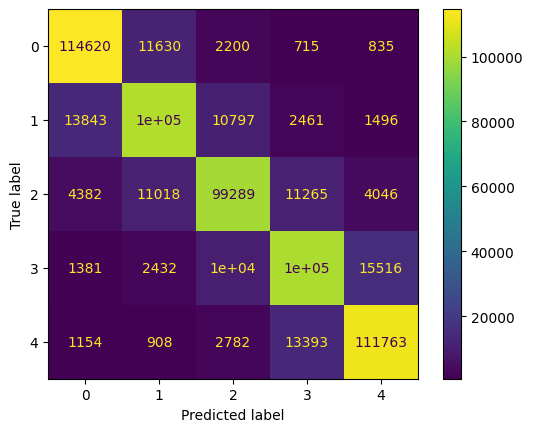

In [251]:
# Displays a confusion matrix based on the predicted vs actual values
cm = confusion_matrix(y_train, predict_train)
ConfusionMatrixDisplay(cm).plot()

# Test Data

In [252]:
y_test = dp_test["label"].values

In [253]:
# # Removes stop words from test data and makes everything lowercase
# dp_test['no_stops'] = dp_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# dp_test['no_stops'] = dp_test['no_stops'].str.lower()

In [254]:
# Creates a set of new features modified to be a bag of words using same training vectorizer (don't have to reformat testing!)
X_features_test = create_bag_words(dp_test, vectorizer, "text")

In [255]:
# Gets label predictions from test data and printing results
predict_test = lgr.predict(X_features_test)
print(classification_report(predict_test, y_test))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74     10555
           1       0.54      0.56      0.55      9607
           2       0.53      0.55      0.54      9642
           3       0.52      0.53      0.53      9856
           4       0.71      0.69      0.70     10340

    accuracy                           0.61     50000
   macro avg       0.61      0.61      0.61     50000
weighted avg       0.62      0.61      0.62     50000


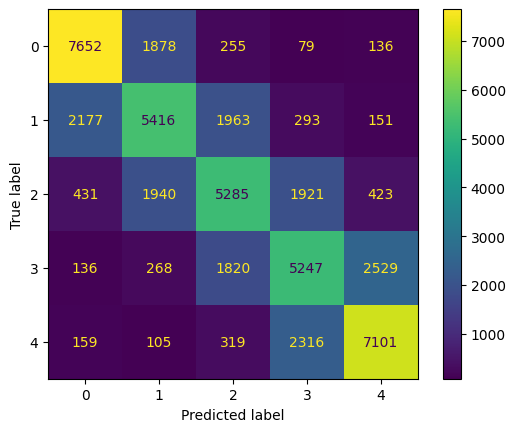

In [256]:
# Displays a confusion matrix based on the predicted vs actual values
cm = confusion_matrix(y_test, predict_test)
ConfusionMatrixDisplay(cm).plot()